In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
cd/content/drive/Shareddrives/MobileNetV2

/content/drive/Shareddrives/MobileNetV2


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

In [ ]:
# Set hyperparameters
batch_size = 32
num_epochs = 10
learning_rate = 0.001
num_classes = 2

In [ ]:
# Load and preprocess the data
train_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train'
val_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation'
test_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test'

In [ ]:
#WITH VAL
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

In [ ]:
# Define the model
model = models.Sequential()
model.add(tf.keras.applications.DenseNet121(include_top=False, input_shape=(224, 224, 3)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(num_classes, activation='softmax'))

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
layer_names=[layer.name for layer in model.layers]
print(layer_names)

['densenet121', 'global_average_pooling2d', 'dense']


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 2050      
                                                                 
Total params: 7,039,554
Trainable params: 6,955,906
Non-trainable params: 83,648
_________________________________________________________________


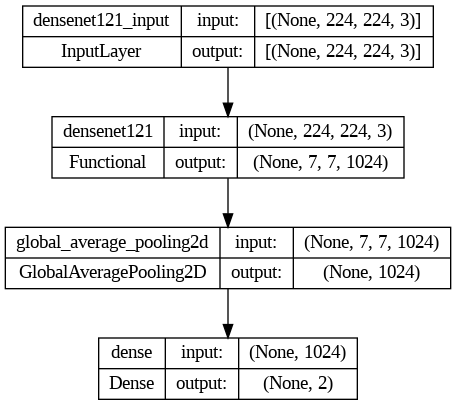

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 26.9 MB/s eta 0:00:00


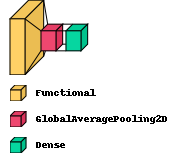

In [ ]:
model1=model
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model1, scale_xy=8, scale_z=15, max_z=15, legend=True)
#visualkeras.layered_view(model1, legend=True)

In [ ]:
# Train the model
model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator)

Epoch 1/10
27/27 [==============================] - 352s 10s/step - loss: 0.6170 - accuracy: 0.7476 - val_loss: 15.0830 - val_accuracy: 0.5000
Epoch 2/10
27/27 [==============================] - 75s 3s/step - loss: 0.2539 - accuracy: 0.9012 - val_loss: 25.8581 - val_accuracy: 0.5000
Epoch 3/10
27/27 [==============================] - 73s 3s/step - loss: 0.2432 - accuracy: 0.9095 - val_loss: 5.9342 - val_accuracy: 0.6167
Epoch 4/10
27/27 [==============================] - 75s 3s/step - loss: 0.1561 - accuracy: 0.9274 - val_loss: 3.9224 - val_accuracy: 0.7167
Epoch 5/10
27/27 [==============================] - 73s 3s/step - loss: 0.1858 - accuracy: 0.9417 - val_loss: 0.8136 - val_accuracy: 0.8167
Epoch 6/10
27/27 [==============================] - 74s 3s/step - loss: 0.1110 - accuracy: 0.9595 - val_loss: 4.3988 - val_accuracy: 0.5889
Epoch 7/10
27/27 [==============================] - 73s 3s/step - loss: 0.1546 - accuracy: 0.9524 - val_loss: 0.9649 - val_accuracy: 0.8611
Epoch 8/10
27/27

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Acc: {test_acc}')

6/6 [==============================] - 47s 9s/step - loss: 0.3618 - accuracy: 0.9389
Test Acc: 0.9388889074325562
